In [17]:
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.patches import Circle, Patch
import matplotlib.image as mpimg

In [8]:
url = "https://understat.com/player/843"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
script_tag = soup.find('script', string=lambda x: x and 'var shotsData' in x)

javascript_content = script_tag.text if script_tag else ""

# Extract data from shotsData
start_index = javascript_content.find("JSON.parse('") + len("JSON.parse('")
end_index = javascript_content.find("')")

# Unescape Unicode and decode the JavaScript string
escaped_json = javascript_content[start_index:end_index]
unescaped_json = bytes(escaped_json, 'utf-8').decode('unicode_escape')

# Parse the JSON data
shots_data = json.loads(unescaped_json)

# Now, shots_data contains the data in var shotsData
print(shots_data)

[{'id': '14494', 'minute': '39', 'result': 'SavedShot', 'X': '0.7390000152587891', 'Y': '0.6079999923706054', 'xG': '0.019021300598978996', 'player': 'James Ward-Prowse', 'h_a': 'a', 'player_id': '843', 'situation': 'OpenPlay', 'season': '2014', 'shotType': 'RightFoot', 'match_id': '4756', 'h_team': 'Liverpool', 'a_team': 'Southampton', 'h_goals': '2', 'a_goals': '1', 'date': '2014-08-17 13:30:00', 'player_assisted': 'José Fonte', 'lastAction': 'Pass'}, {'id': '14502', 'minute': '66', 'result': 'BlockedShot', 'X': '0.730999984741211', 'Y': '0.629000015258789', 'xG': '0.015140400268137455', 'player': 'James Ward-Prowse', 'h_a': 'a', 'player_id': '843', 'situation': 'OpenPlay', 'season': '2014', 'shotType': 'RightFoot', 'match_id': '4756', 'h_team': 'Liverpool', 'a_team': 'Southampton', 'h_goals': '2', 'a_goals': '1', 'date': '2014-08-17 13:30:00', 'player_assisted': 'José Fonte', 'lastAction': 'BallRecovery'}, {'id': '14507', 'minute': '85', 'result': 'SavedShot', 'X': '0.89199996948242

In [18]:
pd.DataFrame(shots_data)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,14494,39,SavedShot,0.7390000152587891,0.6079999923706054,0.019021300598978996,James Ward-Prowse,a,843,OpenPlay,2014,RightFoot,4756,Liverpool,Southampton,2,1,2014-08-17 13:30:00,José Fonte,Pass
1,14502,66,BlockedShot,0.730999984741211,0.629000015258789,0.015140400268137455,James Ward-Prowse,a,843,OpenPlay,2014,RightFoot,4756,Liverpool,Southampton,2,1,2014-08-17 13:30:00,José Fonte,BallRecovery
2,14507,85,SavedShot,0.8919999694824219,0.69,0.05837570130825043,James Ward-Prowse,a,843,OpenPlay,2014,RightFoot,4756,Liverpool,Southampton,2,1,2014-08-17 13:30:00,Graziano Pellè,LayOff
3,14810,69,ShotOnPost,0.740999984741211,0.7469999694824219,0.03464389964938164,James Ward-Prowse,h,843,DirectFreekick,2014,RightFoot,4762,Southampton,West Bromwich Albion,0,0,2014-08-23 15:00:00,None,Standard
4,15138,53,BlockedShot,0.7119999694824218,0.27399999618530274,0.014640900306403637,James Ward-Prowse,a,843,OpenPlay,2014,RightFoot,4774,West Ham,Southampton,1,3,2014-08-30 15:00:00,José Fonte,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,552472,73,ShotOnPost,0.8190000152587891,0.544000015258789,0.05812818929553032,James Ward-Prowse,a,843,OpenPlay,2023,LeftFoot,22041,Tottenham,West Ham,1,2,2023-12-07 20:15:00,None,Goal
378,553415,5,SavedShot,0.665,0.37,0.026970509439706802,James Ward-Prowse,a,843,DirectFreekick,2023,RightFoot,22049,Fulham,West Ham,5,0,2023-12-10 14:00:00,None,Standard
379,554766,18,SavedShot,0.6940000152587891,0.6730000305175782,0.030213475227355957,James Ward-Prowse,h,843,DirectFreekick,2023,RightFoot,22064,West Ham,Wolverhampton Wanderers,3,0,2023-12-17 14:00:00,None,Standard
380,554787,80,MissedShots,0.765,0.6329999923706054,0.06233489140868187,James Ward-Prowse,h,843,DirectFreekick,2023,RightFoot,22064,West Ham,Wolverhampton Wanderers,3,0,2023-12-17 14:00:00,None,Standard


In [3]:
# Extract match date
match_date = soup.find('td', class_='table-cell-goals').text.strip()

# Extract teams' information
team_elements = soup.find_all('td', class_='table-cell-goals with-image')
teams = []
for team_element in team_elements:
    team_name = team_element.find('span', class_='team-name').text.strip()
    team_logo = team_element.find('img')['src']
    teams.append({'name': team_name, 'logo': team_logo})

# Extract players' information
player_elements = soup.find_all('div', class_='player-goals-run-cont')
goal_pos = []
for player_element in player_elements:
    # Subset for relevant data
    data_string = player_element['data-data']
    # Parse the JSON data
    data = json.loads(data_string)

    # Access the values
    oppo_value = data[0][0]['opponent_team_name']
    x_value = data[0][0]['x']
    y_value = data[0][0]['y']
    goal_pos.append({'opposition':oppo_value, 'x_pos': x_value, 'y_pos': y_value})

# Setting team colours
team_colors = {
    'Liverpool FC': 'Liverpool.png',
    'Nottingham Forrest': 'everton.png',
    'Tottenham Hotspur': 'tottenham_hotspur.png',
    'Chelsea': 'chelsea_fc.png',
    'Everton FC': 'everton.png',
    'Fulham': 'Fulham.png',
    'Brighton and Hove Albion': 'Brighton__Hove_Albion.png'
}

# Update each item in the 'data' list with 'team_colour' key
for i, item in enumerate(goal_pos):
    team_name = item['opposition']
    goal_pos[i]['oppo_colour'] = team_colors.get(team_name, 'gray')  # Default to 'gray' if team color not found



AttributeError: 'NoneType' object has no attribute 'text'

In [103]:
from PIL import Image

# Specify the desired width and height for the scaled images
desired_width = 100
desired_height = 100

# Load and resize the images
image_paths = ['Liverpool.png', 'everton.png', 'tottenham_hotspur.png', 'chelsea_fc.png', 'Fulham.png', 
               'Brighton__Hove_Albion.png']  # Replace with the paths to your .png files
for image_path in image_paths:
    image = Image.open(f'Opp_team_logo/{image_path}')
    resized_image = image.resize((desired_width, desired_height), Image.LANCZOS)  # Use LANCZOS for anti-aliasing
    resized_image.save(f"Opp_team_logo/resized_{image_path}", optimize=True, quality=95)  # Save the resized image with a new name

print("Images resized successfully.")


Images resized successfully.


In [108]:
goal_pos

[{'opposition': 'Liverpool FC',
  'x_pos': 93.5,
  'y_pos': 39.9,
  'oppo_colour': 'Liverpool.png'},
 {'opposition': 'Nottingham Forrest',
  'x_pos': 94,
  'y_pos': 34,
  'oppo_colour': 'everton.png'},
 {'opposition': 'Tottenham Hotspur',
  'x_pos': 94,
  'y_pos': 34,
  'oppo_colour': 'tottenham_hotspur.png'},
 {'opposition': 'Chelsea',
  'x_pos': 77.5,
  'y_pos': 42.8,
  'oppo_colour': 'chelsea_fc.png'},
 {'opposition': 'Everton FC',
  'x_pos': 97.4,
  'y_pos': 30.7,
  'oppo_colour': 'everton.png'},
 {'opposition': 'Everton FC',
  'x_pos': 97.4,
  'y_pos': 30.7,
  'oppo_colour': 'everton.png'},
 {'opposition': 'Fulham',
  'x_pos': 76.2,
  'y_pos': 35.1,
  'oppo_colour': 'Fulham.png'},
 {'opposition': 'Brighton and Hove Albion',
  'x_pos': 97.8,
  'y_pos': 33.1,
  'oppo_colour': 'Brighton__Hove_Albion.png'},
 {'opposition': 'Tottenham Hotspur',
  'x_pos': 91.2,
  'y_pos': 33.2,
  'oppo_colour': 'tottenham_hotspur.png'}]

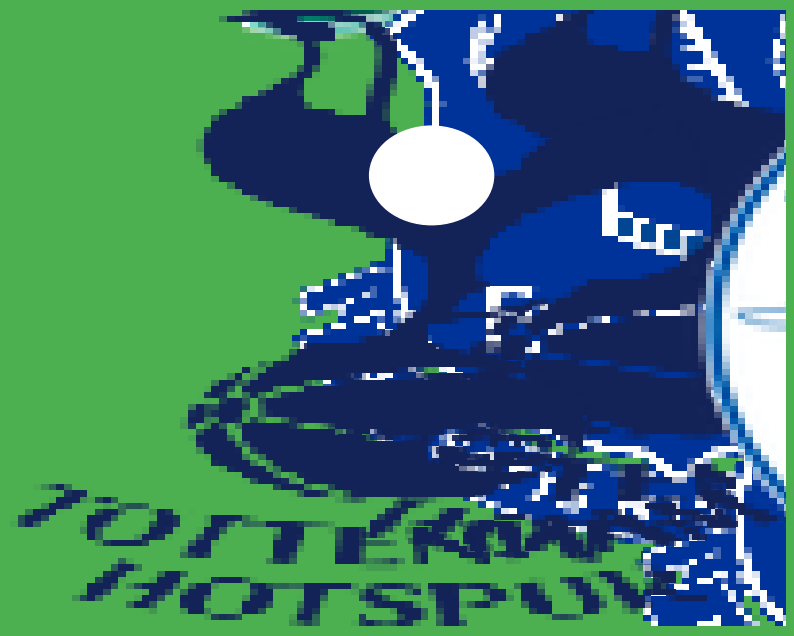

In [112]:
# Define pitch dimensions
pitch_length = 130.0
pitch_width = 90.0

#Create figure
fig=plt.figure()
fig.set_size_inches(10, 8)
fig.set_facecolor('#4CAF50')
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="white")
plt.plot([0,130],[90,90], color="white")
plt.plot([130,130],[90,0], color="white")
plt.plot([130,0],[0,0], color="white")
plt.plot([65,65],[0,90], color="white")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="white")
plt.plot([0,16.5],[65,65],color="white")
plt.plot([16.5,0],[25,25],color="white")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="white")
plt.plot([113.5,113.5],[65,25],color="white")
plt.plot([113.5,130],[25,25],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="white")
plt.plot([5.5,5.5],[54,36],color="white")
plt.plot([5.5,0.5],[36,36],color="white")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="white")
plt.plot([124.5,124.5],[54,36],color="white")
plt.plot([124.5,130],[36,36],color="white")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="white",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="white")
leftPenSpot = plt.Circle((11,45),0.8,color="white")
rightPenSpot = plt.Circle((119,45),0.8,color="white")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

# Plot goal-scoring pitch positions
for point in goal_pos:
    x = point['x_pos']*(130/100)
    y = point['y_pos']*(90/70)
    team_name = point['opposition']
    # oppo_colour = point['oppo_colour']
    badge_path = point['oppo_colour']

    # Load the team badge image
    img = mpimg.imread(f'Opp_team_logo/resized_{badge_path}')

    # Display the image on the pitch at its respective position
    image_size = 5  # Adjust the size of the displayed images
    ax.imshow(img, extent=[x - image_size, x + image_size, y - image_size, y + image_size], alpha=1.0, aspect='auto')



    # Assuming goal-scoring positions are marked with 'x'
    # plt.scatter(x, y, marker='.', color=oppo_colour, s=100)

    # Add team name label
    # plt.text(x, y, team_name, ha='right', va='top', fontsize=8)

# Add legend for team kit colors
# legend_elements = [Patch(facecolor=color, edgecolor='black', label=team_name)
#                    for team_name, color in team_colors.items()]
# ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

#Display Pitch
plt.show()